# Cluster Analysis

Step 1: Specify the number of clusters we would want (k)<br>
Step 2: Randomly initialize the centroid of each cluster<br>
Step 3: Determine which data points belong to which cluster by finding the closest centroid to each data points<br>
Step 4: Update the centroid based on the geometric mean of all the data points in the cluster<br>
Step 5: Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration<br>

In [141]:
import numpy as np
import pandas as pd


In [142]:
data = pd.read_csv("/Users/karnavivek/All-in-One/Unsupervised Learning/cluster_data/players_22.csv")
data

/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_46979/2259602225.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/karnavivek/All-in-One/Unsupervised Learning/cluster_data/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


Note: So by looking at the data, we wish to cluster the fifa players of year 2022 for their 
- "overall" rating
- "potential" rating
- "wage_eur" : salary
- 'value_eur" : value to the club
- "age"

In [143]:
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

In [144]:
players = data.dropna(subset=features) #subset will tell pandas to only search missing data in only specific columns, in this case, we have "features"
#this ensures that, what ever we have using for clustering doesnt have missing values, clustering algo doesnt do well if its stayed in

In [145]:
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [146]:
'''1. Features Scaling the data, to treat every column same'''


data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1 #we do +1 here to avoid data getting 0 value 
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: ylabel='wage_eur'>

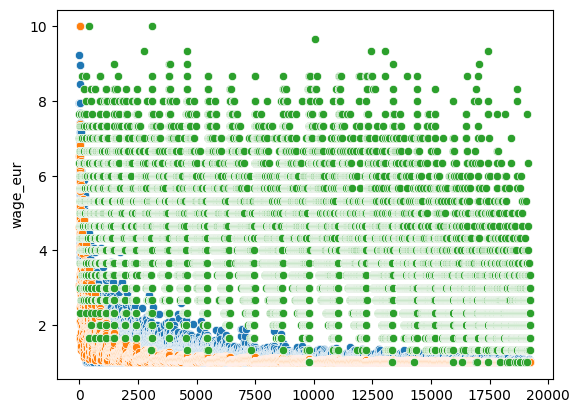

In [147]:
import seaborn as sns

sns.scatterplot(data.wage_eur)
sns.scatterplot(data.value_eur)
sns.scatterplot(data.age)

In [148]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [149]:
'''Determine the random centroid'''
# k is number of clusters
def random_centroids(data, k):
    centroids = []
    
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) #this lambda function will go through every column & select a random sample & make it as a centroid
        centroids.append(centroid)
        
    return pd.concat(centroids, axis=1)

# centroids_names = [f'centroid_{j}' for j in range(1,k+1)]
centroids = random_centroids(data, 5)
centroids
# pd.DataFrame(centroids, columns=centroids_names)

/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_46979/97117816.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample())) #this lambda function will go through every column & select a random sample & make it as a centroid


,0,1,2,3,4
overall,5.108696,3.543478,4.326087,3.152174,7.260870
potential,6.869565,4.130435,3.934783,5.108696,6.282609
wage_eur,1.000000,1.038627,1.012876,1.064378,1.064378
value_eur,1.073813,1.208355,1.020460,1.087731,1.013501
age,4.000000,1.666667,4.333333,3.666667,3.000000


In [150]:
centroids.iloc[:,0]

overall      5.108696
potential    6.869565
wage_eur     1.000000
value_eur    1.073813
age          4.000000
Name: 0, dtype: float64

In [151]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [152]:
labels = get_labels(data, centroids)
labels

0        4
1        4
2        4
3        4
4        4
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [153]:
labels.value_counts()

2    6621
0    5832
3    3041
1    2301
4    1370
Name: count, dtype: int64

In [154]:
'''Next step is to update the centroid by calucluating the geometric mean (this gives us new centroids)'''
def new_centroids(data, labels, k):
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


here 4.769392 is the geometric mean of the centroid of all the "overall" values for cluster 0, <br>
similarly, 1.135794 is the geometric mean (new center) of "wage_eur" values for cluster 2

In [155]:
from sklearn.decomposition import PCA #5 features to 2 for better visualization
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [156]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration: {iteration}")
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

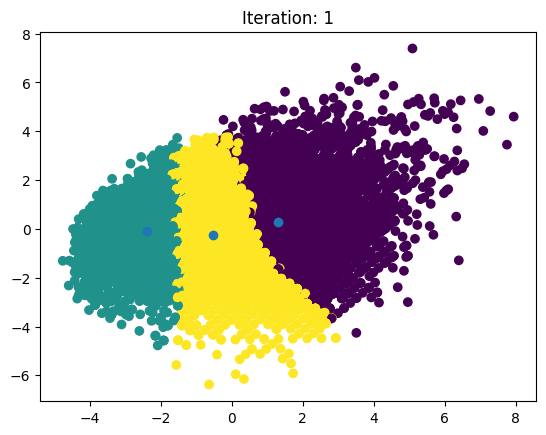

In [157]:
#bring it all together

max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration = iteration + 1

In [158]:
centroids

,0,1,2
overall,6.478261,3.152174,3.934783
potential,5.108696,4.521739,5.304348
wage_eur,1.012876,1.167382,1.270386
value_eur,1.006542,1.069173,1.026259
age,4.333333,2.333333,4.000000


With the above clusters, we can deduce lot of insights!

In [166]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
9740,M. Cardozo,66,66,500.0,90000.0,38
9805,J. Bothroyd,65,65,1000.0,240000.0,39
9807,A. Mannus,65,65,500.0,80000.0,39
10042,D. Vaca,65,65,500.0,80000.0,42


## Lets use it using Sklearn

In [162]:
from sklearn.cluster import KMeans

In [163]:
kmeans = KMeans(3) #here 3 is number of clusters
kmeans.fit(data)

KMeans(n_clusters=3)

In [165]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.232910,3.601045,4.800664
potential,6.623315,5.207475,4.503674
wage_eur,1.657878,1.040009,1.112818
value_eur,1.414071,1.035859,1.039996
age,4.142420,2.712137,5.608914


These insights can be used for various business decisions